In [1]:
import pandas as pd 

In [2]:
file_path = '../data/Electric_Vehicle_Population_Data.csv'

ev_data = pd.read_csv(file_path)

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


Clean the data

In [4]:
ev_data.shape

(177866, 17)

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
# Remove rows with missing values (NaNs) from the DataFrame
ev_data = ev_data.dropna()

We explore the following to analyze the market size of electric vehicles:
- EV Adoption Over Time: Analyze how the number of EVs has increased each model year.
- Geographical Distribution: Determine the countries and cities where EV registrations are highest.
- EV Types: Dataset breakdown according to kind of electric vehicle (BEV, etc.).
- Make and Model Popularity: List the most popular models and makes among the EVs that are registered.
- Electric Range Analysis: Analyze the electric range of vehicles to gauge the advancement of EV technology.
- Estimated Market Growth: Perform an analysis to determine the estimated growth for the electric vehicle market.

Analyzing EV Adoption Over Time by visualizing the number of EVs registered by model year.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

C:\Users\manua\AppData\Local\Temp\ipykernel_8240\3102050853.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="BuGn")


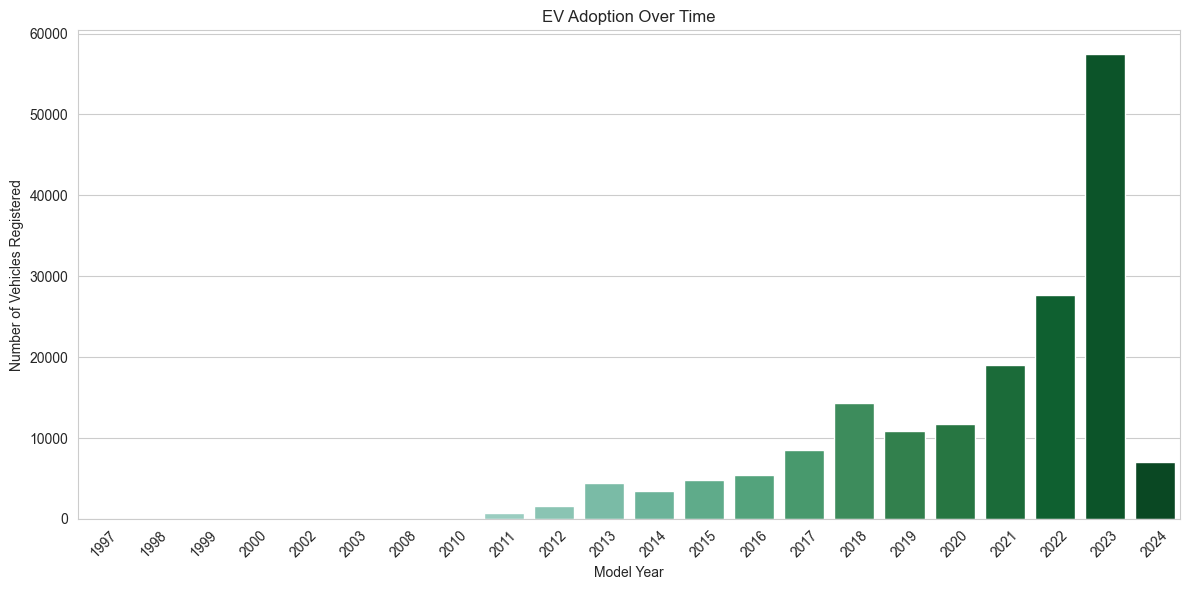

In [9]:
# EV Adoption Over Time
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="BuGn")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45) # rotates labels by 45 degrees
plt.tight_layout() # adjusts layout to ensure everything fits within the figure
plt.show()

- It is evident from the bar chart that the adoption of EVs has been rising over time, with a notable upward trend beginning around 2016. Up until then, the number of registered cars increases gradually. After that, it starts to increase more quickly starting in 2017. The number of registered EVs increases particularly sharply in 2023; the graph's 2023 bar is the biggest, signifying a peak in EV adoption.

Geographical Distribution - selecting top 3 counties based on EV registrations and then analyze the distribution of EVs with the cities.

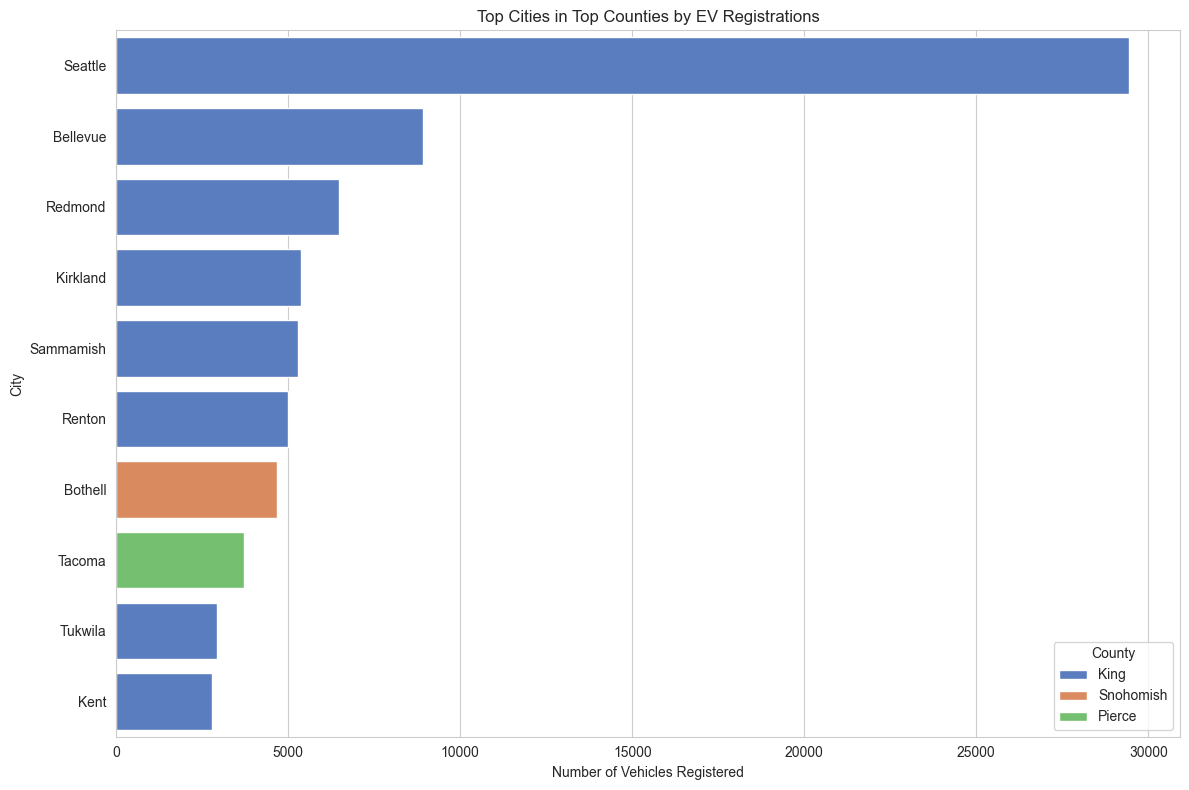

In [10]:
# Geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# Filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="muted")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

- The number of electric vehicles registered in different cities throughout three counties—King, Snohomish, and Pierce is compared in the above graph. The cities are shown by the horizontal bars, whose lengths are color-coded by county to indicate the number of registered vehicles. 

- Overall, the graph shows that the adoption of EVs is not evenly distributed throughout the cities, but rather is concentrated in a few places, especially in King County.

Types of Electric Vehicles - analyze which type is more popular

C:\Users\manua\AppData\Local\Temp\ipykernel_8240\1636089381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


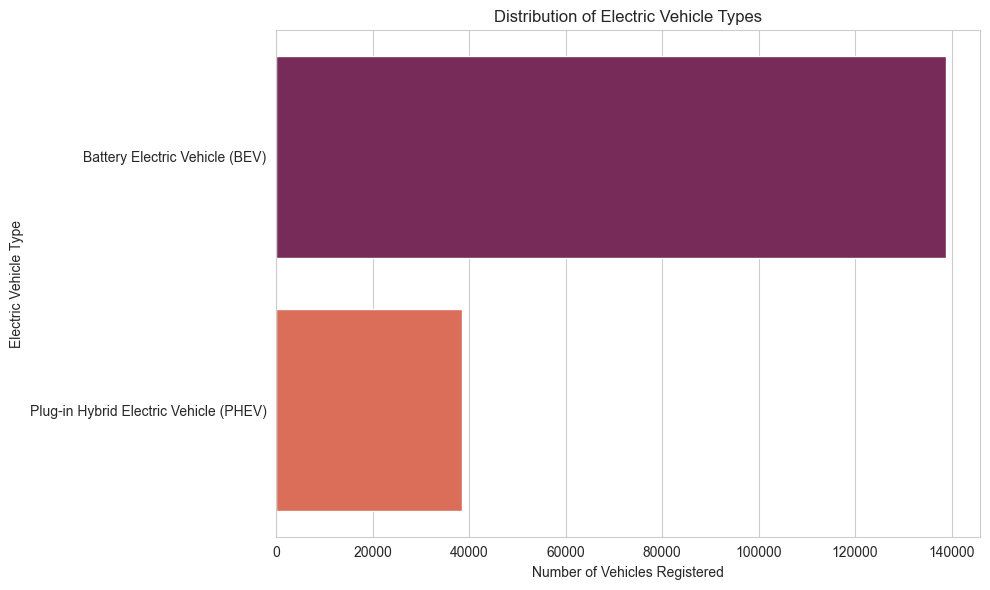

In [11]:
# Analyzing the distribution of electric vehicle types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

- Based on the above graph, among electric vehicles registered in the US, BEVs are more common or favored than PHEVs.

Vehicle Make Popularity

C:\Users\manua\AppData\Local\Temp\ipykernel_8240\3326612369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


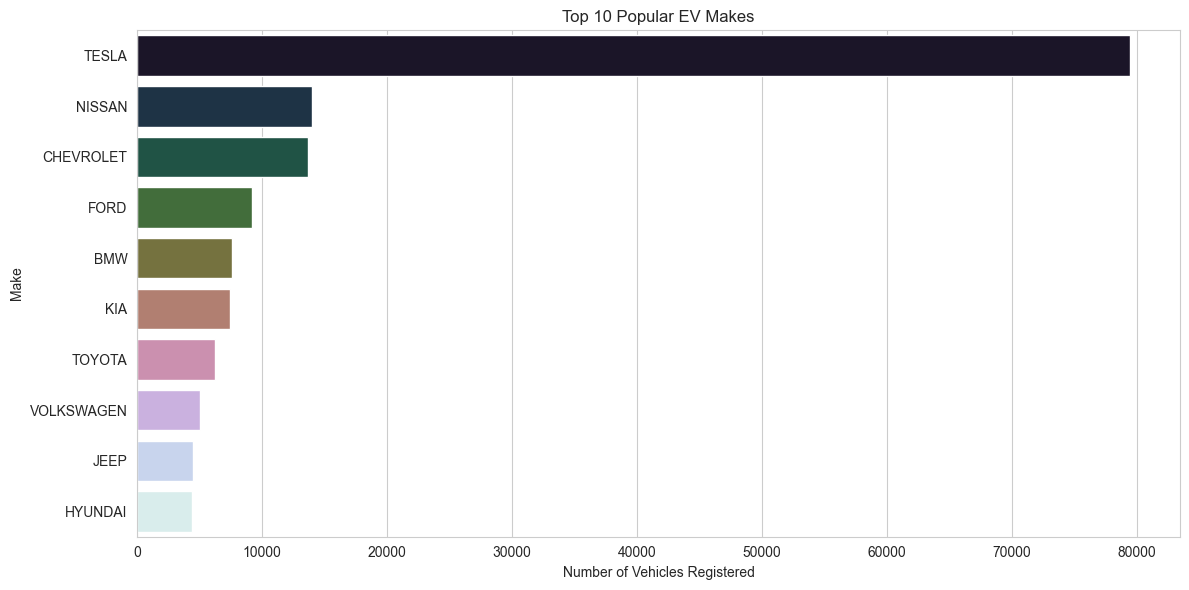

In [14]:
# Analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

- The above chart shows that:
  - TESLA has the largest number of registered vehicles, leading by a significant margin.
  - The two most popular manufacturers are NISSAN and CHEVROLET, however their registration numbers are far lower than TESLA's.
  - FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI are listed in descending order of registered vehicles.

Most Popular Models

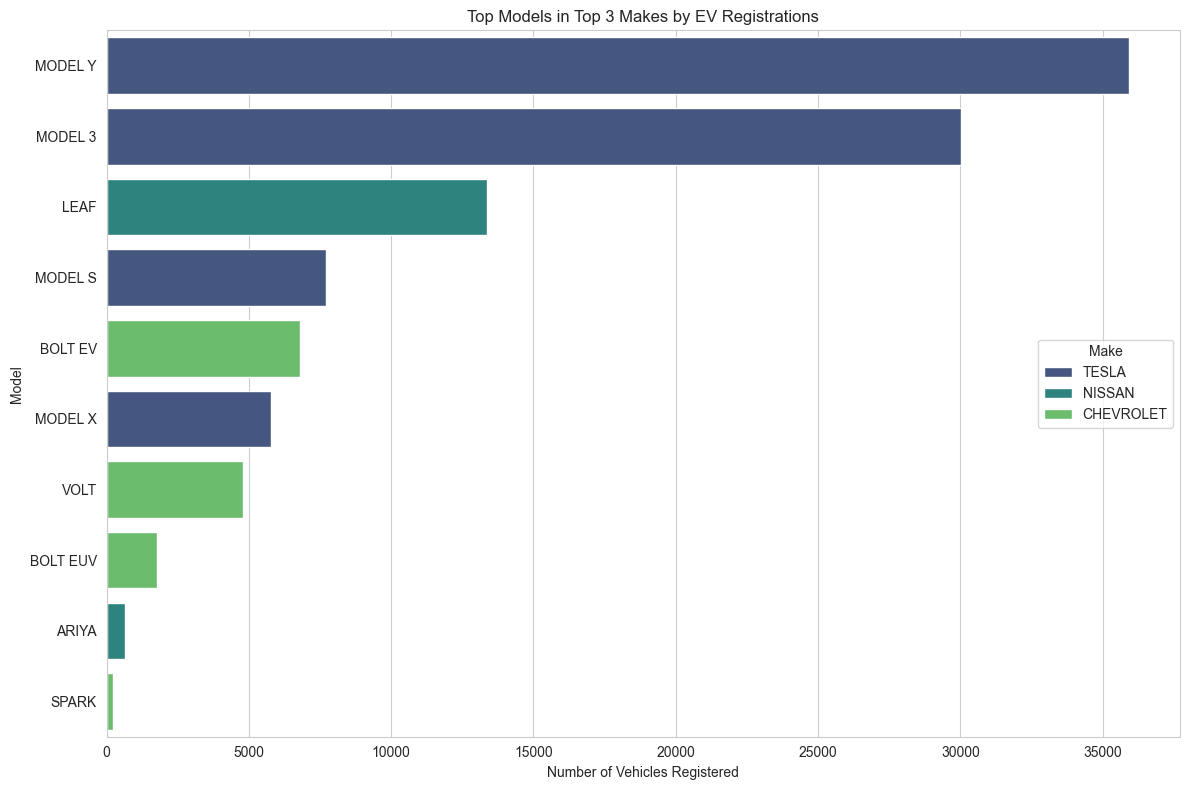

In [15]:
# Selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# Filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

- The graph above shows the distribution of electric car registrations across the top three manufacturers: Tesla, Nissan, and Chevrolet. Here are the results:
  -  The most registered vehicles are TESLA's MODEL Y and MODEL 3, with MODEL Y having the most registrations.
  -  The Nissan LEAF is the third most popular model and the most registered non-TESLA vehicle.
  - TESLA's MODEL S and MODEL X have a large number of registrations.
  - CHEVROLET's BOLT EV and VOLT are next in the rankings, with significant registrations, followed by the BOLT EUV.
  - NISSAN's ARIYA and CHEVROLET's SPARK have the fewest registrations among the vehicles presented.

Electric Range Analysis - Electric range indicates how far an EV can travel on a single charge, and advances in battery technology have gradually increased these ranges over time.

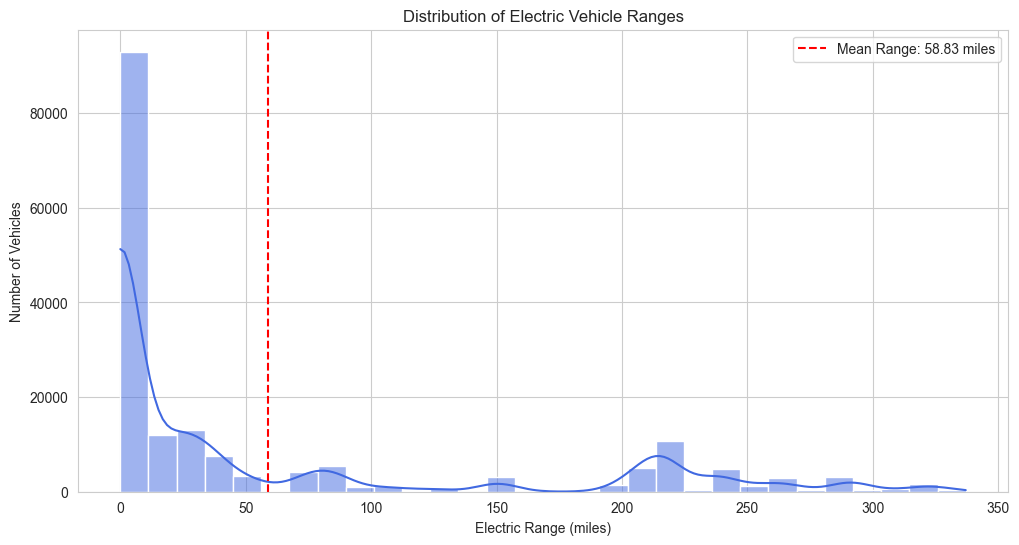

In [18]:
# Analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

- The graph above illustrates an average electric range.
  - The graph shows a high number of vehicles with low electric range, with a peak shortly before 50 miles.
  - The distribution is skewed to the right, with a long tail extending to greater ranges, despite the fact that vehicles with higher ranges are far less common.
  - The average electric range for this group of vehicles is roughly 58.84 miles, which is very low when compared to the maximum ranges indicated in the graph.
  - Despite the presence of electric vehicles with ranges of up to 350 miles, the majority of vehicles have a lower range than the average.
- It indicates that, while there are EVs with long electric ranges, the average range is biased lower due to the large number of vehicles with limited ranges.

Trend of electric ranges over model years - provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time.

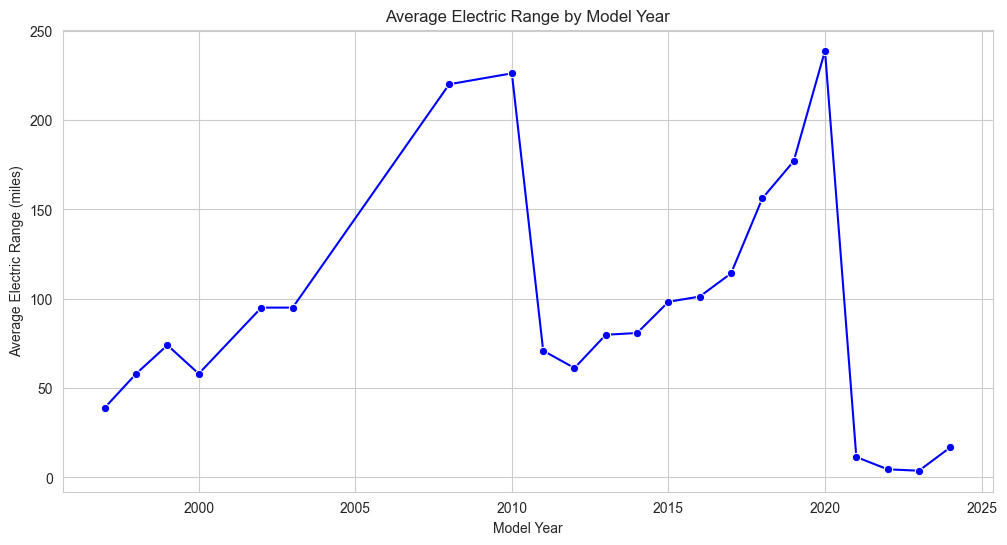

In [19]:
# Calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='blue')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


- The graph shows the average electric range of vehicles from around 2000 to 2024. Here are the key points:
  - The average range of electric vehicles (EVs) has generally increased over the years, showing improvements in technology and batteries.
  - The average range peaked around 2020, reaching its highest point.
  - After 2020, the average range dropped significantly, possibly due to incomplete data or the release of more lower-range models.
  - There is a slight recovery in the average range in the most recent year shown.
- Overall, despite some ups and downs, the trend over the past two decades has been an increase in the electric range of EVs.